In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d5a0883de07a2a1bfb1281943049df2


In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | buon me thuot
City not found. Skipping...
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | kargil
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | nhulunbuy
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | keti bandar
Processing Record 16 of Set 1 | tahoua
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | longyearbyen
Processing R

Processing Record 36 of Set 4 | jega
Processing Record 37 of Set 4 | romny
Processing Record 38 of Set 4 | igarka
Processing Record 39 of Set 4 | suffolk
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | camacha
Processing Record 43 of Set 4 | obihiro
Processing Record 44 of Set 4 | kudahuvadhoo
Processing Record 45 of Set 4 | haibowan
City not found. Skipping...
Processing Record 46 of Set 4 | mahad
Processing Record 47 of Set 4 | mehamn
Processing Record 48 of Set 4 | manuk mangkaw
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | pevek
Processing Record 1 of Set 5 | portobelo
Processing Record 2 of Set 5 | lazaro cardenas
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | george town
Processing Record 6 of Set 5 | laem sing
Processing Record 7 of Set 5 | karaton
Processing Record 8 of Set 5 | tautira
Processing Record 9 of Set 5 | sur
Pro

Processing Record 28 of Set 8 | mabaruma
Processing Record 29 of Set 8 | mpika
Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | virovitica
Processing Record 32 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 33 of Set 8 | bathsheba
Processing Record 34 of Set 8 | saint-paul
Processing Record 35 of Set 8 | japura
Processing Record 36 of Set 8 | katangli
Processing Record 37 of Set 8 | dambulla
Processing Record 38 of Set 8 | pangkalanbuun
Processing Record 39 of Set 8 | iqaluit
Processing Record 40 of Set 8 | bonavista
Processing Record 41 of Set 8 | nyurba
Processing Record 42 of Set 8 | candido de abreu
Processing Record 43 of Set 8 | nibbar
Processing Record 44 of Set 8 | udomlya
Processing Record 45 of Set 8 | los alamos
Processing Record 46 of Set 8 | labrea
Processing Record 47 of Set 8 | naze
Processing Record 48 of Set 8 | mineros
Processing Record 49 of Set 8 | ler
Processing Record 50 of Set 8 | nanma
Processing Record 1 of Set 9 | k

Processing Record 18 of Set 12 | marcona
City not found. Skipping...
Processing Record 19 of Set 12 | lompoc
Processing Record 20 of Set 12 | howard springs
Processing Record 21 of Set 12 | port hardy
Processing Record 22 of Set 12 | lagoa
Processing Record 23 of Set 12 | balao
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | berlevag
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | santa margherita ligure
Processing Record 28 of Set 12 | cap malheureux
Processing Record 29 of Set 12 | sundsvall
Processing Record 30 of Set 12 | arusha
Processing Record 31 of Set 12 | cherskiy
Processing Record 32 of Set 12 | barsana
Processing Record 33 of Set 12 | chateaubelair
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | lloydminster
Processing Record 36 of Set 12 | biak
Processing Record 37 of Set 12 | henties bay
Processing Record 38 of Set 12 | jinxiang
Processing Record 39 of Set 12 | rio verde de mato grosso

In [13]:
# Tally the number of cities in the city_data array of dictionaries
len(city_data)

581

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,38.70,75,66,5.93,RU,2022-07-17 05:33:26
1,Saskylakh,71.9167,114.0833,62.40,49,92,12.93,RU,2022-07-17 05:27:07
2,Kargil,34.5667,76.1000,65.14,37,62,3.06,IN,2022-07-17 05:33:26
3,Los Llanos De Aridane,28.6585,-17.9182,65.95,95,100,14.97,ES,2022-07-17 05:33:27
4,Kodiak,57.7900,-152.4072,58.51,82,100,0.00,US,2022-07-17 05:24:24
5,Qaanaaq,77.4840,-69.3632,47.28,65,11,3.53,GL,2022-07-17 05:33:27
6,Nhulunbuy,-12.2333,136.7667,79.41,69,75,13.80,AU,2022-07-17 05:33:27
7,Punta Arenas,-53.1500,-70.9167,32.11,80,75,16.11,CL,2022-07-17 05:28:11
8,Bethel,41.3712,-73.4140,71.96,90,100,0.00,US,2022-07-17 05:28:15
9,Castro,-24.7911,-50.0119,62.58,89,100,9.04,BR,2022-07-17 05:24:21


In [15]:
# Reorder the Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-17 05:33:26,71.6872,128.8694,38.70,75,66,5.93
1,Saskylakh,RU,2022-07-17 05:27:07,71.9167,114.0833,62.40,49,92,12.93
2,Kargil,IN,2022-07-17 05:33:26,34.5667,76.1000,65.14,37,62,3.06
3,Los Llanos De Aridane,ES,2022-07-17 05:33:27,28.6585,-17.9182,65.95,95,100,14.97
4,Kodiak,US,2022-07-17 05:24:24,57.7900,-152.4072,58.51,82,100,0.00
5,Qaanaaq,GL,2022-07-17 05:33:27,77.4840,-69.3632,47.28,65,11,3.53
6,Nhulunbuy,AU,2022-07-17 05:33:27,-12.2333,136.7667,79.41,69,75,13.80
7,Punta Arenas,CL,2022-07-17 05:28:11,-53.1500,-70.9167,32.11,80,75,16.11
8,Bethel,US,2022-07-17 05:28:15,41.3712,-73.4140,71.96,90,100,0.00
9,Castro,BR,2022-07-17 05:24:21,-24.7911,-50.0119,62.58,89,100,9.04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

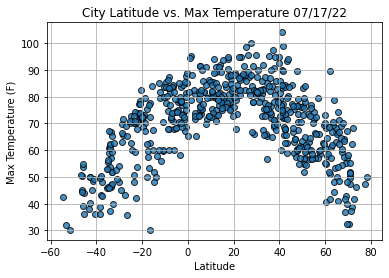

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

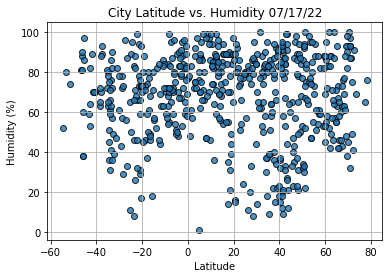

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

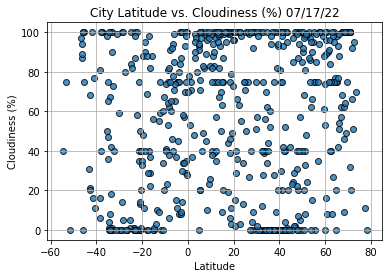

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

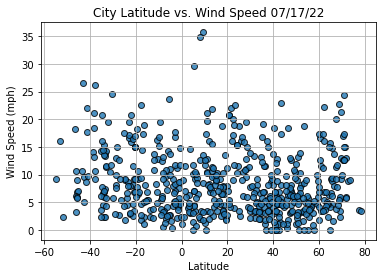

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Khatanga
Country                        RU
Date          2022-07-17 05:33:29
Lat                       71.9667
Lng                         102.5
Max Temp                    68.29
Humidity                       41
Cloudiness                     51
Wind Speed                   5.84
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
576     True
577     True
578    False
579     True
580     True
Name: Lat, Length: 581, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-17 05:33:26,71.6872,128.8694,38.70,75,66,5.93
1,Saskylakh,RU,2022-07-17 05:27:07,71.9167,114.0833,62.40,49,92,12.93
2,Kargil,IN,2022-07-17 05:33:26,34.5667,76.1000,65.14,37,62,3.06
3,Los Llanos De Aridane,ES,2022-07-17 05:33:27,28.6585,-17.9182,65.95,95,100,14.97
4,Kodiak,US,2022-07-17 05:24:24,57.7900,-152.4072,58.51,82,100,0.00
...,...,...,...,...,...,...,...,...,...
575,Elektrogorsk,RU,2022-07-17 06:25:10,55.8794,38.7919,66.13,61,99,3.53
576,Aasiaat,GL,2022-07-17 06:25:10,68.7098,-52.8699,36.93,88,64,5.44
577,Goundi,TD,2022-07-17 06:25:11,9.3627,17.3660,72.93,94,100,1.83
579,Kosa,RU,2022-07-17 06:25:11,59.9445,54.9977,73.31,45,0,7.81


In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-07-17 05:33:26,71.6872,128.8694,38.70,75,66,5.93
1,Saskylakh,RU,2022-07-17 05:27:07,71.9167,114.0833,62.40,49,92,12.93
2,Kargil,IN,2022-07-17 05:33:26,34.5667,76.1000,65.14,37,62,3.06
3,Los Llanos De Aridane,ES,2022-07-17 05:33:27,28.6585,-17.9182,65.95,95,100,14.97
4,Kodiak,US,2022-07-17 05:24:24,57.7900,-152.4072,58.51,82,100,0.00


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

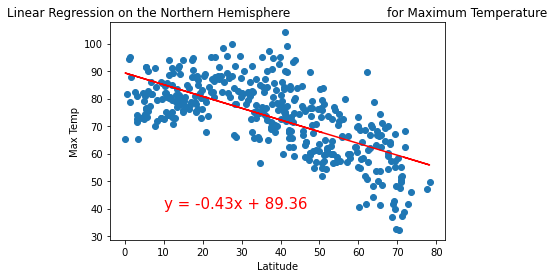

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

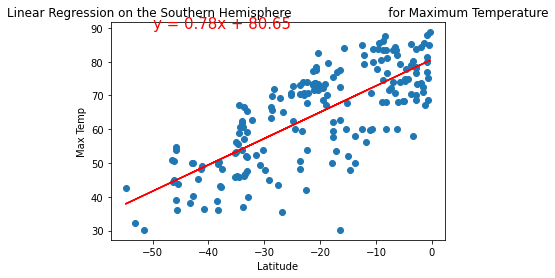

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

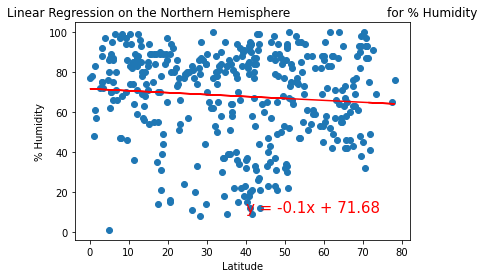

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

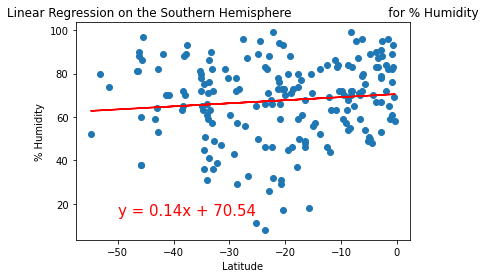

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

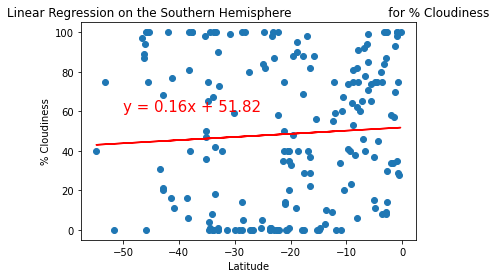

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

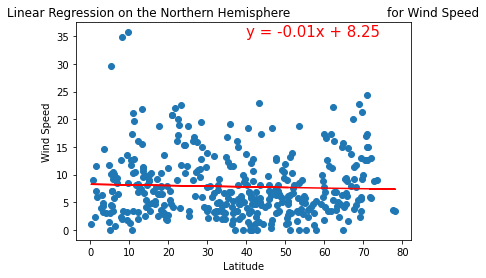

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

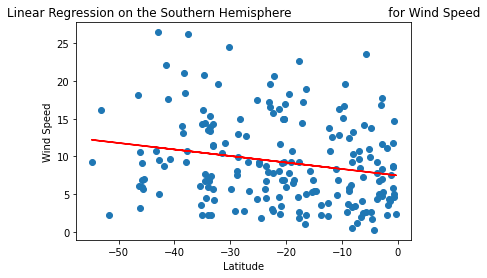

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))